# Introduction to Data Visualization with Matplotlib
Run the hidden code cell below to import the data used in this course.

In [2]:
# Importing the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the course datasets 
climate_change = pd.read_csv('datasets/climate_change.csv', parse_dates=["date"], index_col="date")
medals = pd.read_csv('datasets/medals_by_country_2016.csv', index_col=0)
summer_2016 = pd.read_csv('datasets/summer2016.csv')
austin_weather = pd.read_csv("datasets/austin_weather.csv", index_col="DATE")
weather = pd.read_csv("datasets/seattle_weather.csv", index_col="DATE")

# Some pre-processing on the weather datasets, including adding a month column
seattle_weather = weather[weather["STATION"] == "USW00094290"] 
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
seattle_weather["MONTH"] = month 
austin_weather["MONTH"] = month

## Take Notes

Add notes about the concepts you've learned and code cells with code you want to keep.

## Intro to Data Visualization with Matplotlib 

The main object oriented interface of Matplotlib is provided through the pyplot submodule.

plt.subplots() command without any arguments creates 2 different objects: the figure and the axes. Figure is a container that holds everything you see on the page, and axes is the part of the page that holds all the data. it's the canvas in which we'll draw our data to visualize it 

The figure and the axes objects are created first before calling the plot commands: fig, ax = plt.subplots()

To add the data to the axes, you call the ax.plot() command. The plotting commands are the methods of the axes object

In [ ]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(seattle_weather["MONTH"], seattle_weather['MLY-PRCP-NORMAL'])

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])

# Call the show function to show the result
plt.show()

## Customizing your plots

In the .plt() command, the marker= argument adds markers to line to represent where the data is represented on the line. "o" adds circles as markers, "v" adds triangles as markers. The Matplotlib documentation will show more types of markers

"linestyle" will change the type of line connecting the markers, with "--" creating a dashed line, and "none" removing the lines. The documentation has more options

"color" will change the color of the lines and markers. "r" makes them red

In addition to the .plot() method, the axis object has several methods that start with the word set. You can use these to change certain properties, before calling .show() to display it. .set_xlabel() takes a string to create the x label (style: only first word in label is capitalized unless it's a proper noun). You can also use .set_ylabel(), and .set_title()

In [ ]:
# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color='b', marker="o", linestyle='--')

# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color='r', marker='v', linestyle='--')

# Call show to display the resulting plot
plt.show()

## Small Multiples

Refers to using multiple small plots that show similar data across different conditions. In Matplotlib, small multiples are called subplots. Passing fig, ax = plt.subplots() with no inputs, which creates one subplot. They're typically arranged on the page as a grid with rows and columns, with the first argument defining the rows, and the second defining the columns. Once you have these arguments in there, the variable ax is no longer only one axes object, but it becomes an array of Axes objects with a shape the number of listed in the arguments. When you add data into the figure, you have to index into this object and call the plot method on an element of the array

There is a special case where you only have one row or one column of plots. The resulting array would be 1-dimensional, and you will only have to provide one index to access all the elements of this array. So if the arguments are (2,1), you could add the data you want in the first element of the array using ax[0].plot(....), and use ax[1].plot(...) for the second (bottom) element in the array

If the different plots end up having different y ranges because of their values, you can use the sharey=True argument in plt.subplots() to make the y-values all in the same range

In [ ]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1,0].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1,1,].plot(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'])
plt.show()

In [ ]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'], color = "b")
ax[0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-25PCTL'], color = 'b', linestyle = '--')
ax[0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-25PCTL'], color = 'b', linestyle = '--')

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'], color = 'r')
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-25PCTL'], color = 'r', linestyle = '--')
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-75PCTL'], color = 'r', linestyle = '--')

plt.show()

## Plotting time-series data



In [ ]:
# Reading data from a .csv with a time index
# This is important because a lot of the DataFrames in this course have a date column loaded in as DateTimeIndex, so when you're using it as an x-axis, you call it as df.index

# Import pandas
import pandas as pd

# Read the data from file using read_csv
# Use the parse_dates key-word argument to parse the "date" column as dates. This argument takes sequences (e.g., lists) as input.
# Use the index_col key-word argument to set the "date" column as the index. The key-word argument index_col takes a string as input.
climate_change = pd.read_csv('climate_change.csv', parse_dates=["date"], index_col="date")

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
# Slicing for 1970 data
seventies = climate_change["1970-01-01":"1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

## Plotting time-series with different variables

Different variables can have different units that will mess up presenting data in the same figure. You can plot stuff in the same sub-plot, using 2 different y-axis scales. Use the ax.twinx() method to create a twin of the Axes, assigning it to something like ax2. They'll share the same x-axis, but will have different y-axes. You add the other variable to this second Axes object and show the figure. Might need different colors to distinguish between the 2 variables, and you can set the y label colors to match up to the variables

You can also change the color of the y axis ticks and y axis tick labels using .tick_params(), first passing in for which label ('x' or 'y'), then stuff like color=

In [ ]:
import matplotlib.pyplot as plt

# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='b')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='r')

plt.show()

This section also guides you through creating a function for generating time series plots

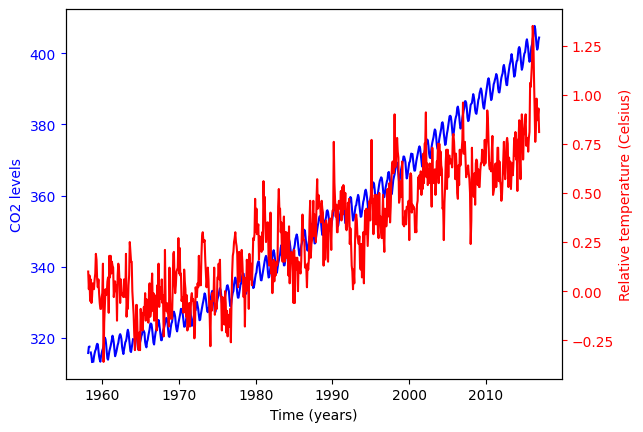

In [3]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)
    
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], "blue", 'Time (years)', 'CO2 levels')

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], "red", 'Time (years)', 'Relative temperature (Celsius)')

plt.show()    

## Annotating Time-Series Data

You can use a method of the Axes object called .annotate() to make notes on a figure. You can at minimum pass a string as the argument, and the xy coordinate we would like to annotate. If the x-value is a date, the value to annotate has the x position of the TimeStamp of that date. We use the pandas time-stamp object to define that. The y value for the argument is the y value at that position of x. You can also pass an xytext= argument for the position of the actual text. You experiment a little to find a good position for the text that's legible. 

You can add an arrow that connects the text to the data using arrowprops= (meaning arrow properties), where the argument input is a dictionary. If it's empty, it'll just have default properties. One good dictionary setting is {'arrowstyle':'->', 'color':'gray'}. That arrow style makes a thin line with a wide head

In [ ]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', "Time (years)", 'CO2 levels')

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', "Time (years)", 'Relative temp (Celsius)')

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={"arrowstyle":"->", "color":"gray"})

plt.show()

## Quantitative comparisons: bar-charts

General command for bar charts is ax.bar(x, y), where x will be the categories and y will be the counted values. After calling ax.bar(), you can use ax.set_xticklabels(x, rotation=) to update the rotation of the tick labels. Add y-label using ax.set_ylabel("Title") to add a label. You can add multiple bars by calling multiple ax.bar(), adding the bottom= argument to matplotlib that this column's data will start at the top of the previous column's data. If you add another ax.bar() set the bottom= arugment equal to the sum of the previous two bars. To label the different bars, add the label= argument to each ax.bar() call, equal to the title you want it to have, and then add ax.legend() before calling plt.show()

In [ ]:
# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label="Gold")

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'], label='Silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals['Bronze'], bottom=medals['Gold'] + medals['Silver'], label='Bronze')

# Display the legend
ax.legend()

plt.show()

## Quantitative comparisons: histograms

You _could_ use a bar chart, use ax.bar(), using a string for the first argument to define x, and then calling the column.mean(). Make a separate ax.bar() for each variable on the chart.

The better way is to use the ax.hist() method, and pass the entire column in. Repeat in separate ax.bar() calls for each variable. You can add the label= arguments and call ax.legend(). You can add bins= to each ax.hist() to set the number of bins; the default is 10. If you provide a sequence of values in [], the bins will be broken up to those boundaries. For histograms where the data is overlaid by the different variables, you can use histtype= and set it to "step". It'll make the chart thin lines instead of solid

In [ ]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'], label='Rowing', histtype='step', bins=5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'], label='Gymnastics', histtype='step', bins=5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

## Statistical Plotting

it's a set of methods for using visualization to make comparisons. You can add error bars in bar charts to indicate the distribution of the data in one number, such as the standard deviation. You can add the error bar as an argument in a bar chart (yerr=value.std())

In [ ]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics['Height'].mean(), yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

You can also add to a line polt, using the same yerr= argument, and the ax.errorbar() method, where you will pass all of your argurments.

In [ ]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"], yerr=seattle_weather["MLY-TAVG-STDDEV"])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather['MONTH'], austin_weather["MLY-TAVG-NORMAL"], yerr=austin_weather["MLY-TAVG-STDDEV"])

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

To call a boxplot, use ax.boxplot([]), containing the list of values of interest. You'll need to add x-labels. Box-plot will cover about 99% of the data is the data is Gaussian or normal

In [ ]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(["Rowing", "Gymnastics"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

## Quantitative comparisons: scatter plots

Bi-variate comparisons: comparing values of different variables across observations. An example is a scatter plot. The location of each point is determined by the value of two variables: the first variable determines the distance along the x-axis and the second variable determines the height along the y-axis.

When setting up the scatter plot, you can define the c= argument for color, and pass a variable there to be encoded as color. 

In [ ]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()

### Time Series Indexing



In [ ]:
eighties = climate_change["1980-01-01":"1989-12-31"]

## Preparing your figures to share with others

You can change figure styles by using plt.style.use("ggplot") before the rest of your plot code, which emulates R library ggplot by changing multiple elements. Use "default" to go back to normal. You can see styles here: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html. "bmh", "seaborn-colorblind" are other options

Dark backgrounds are discouraged, as they are less visible. For color, try using "tableau-colorblind10" or "seaborn-colorblind". Figures used on websites should be treated differently than ones on reports. If you're printing, try to use less ink. There's a 'grayscale' style if it'll be printed in black and white

## Saving your visualizations

You can replace the call for plt.show() with fig.savefig("filename.png"). You can call the unix ls function, which will give us a listing of the files in the present working directory. You can also save as .png, which is higher quality but larger, provides loseless compression of image. .jpg would be good for a website, it uses lossy compression, and can be used to make images that take up less space. quality= can be used to change quality from 1 - 100, but above 95 should be avoided since compression has no effect. .svg will create a vector graphics file, where different elements can be edited in detail in programs like Adobe. dpi= will also control quality (dots per inch; 300 would be fairly high quality). fig.set_size_inches([]) takes a list to determine the size of the figure, where the first number will set the width, and the second will set the height on the page

## Automating figures from data

A column of a DataFrame is a series, so you can call the column and use .unique() to identify the list of unique values. 

In [ ]:
# Extract the "Sport" column
sports_column = summer_2016_medals['Sport']

# Find the unique values of the "Sport" column
sports = sports_column.unique()

# Print out the unique sports values
print(sports)

fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016_medals[summer_2016_medals['Sport'] == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df['Weight'].mean(), yerr=sport_df['Weight'].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

# Save the figure to file
fig.savefig('sports_weights.png')

## What next

There's a gallery of examples on this website, including the full Python code: https://matplotlib.org/2.0.2/gallery.html

You can visualize in 3D by adding perspective, and you can visualize images using Pseudo-code: https://matplotlib.org/2.0.2/users/image_tutorial.html

Animations: https://matplotlib.org/stable/api/animation_api.html

Geospatial data: https://scitools.org.uk/cartopy/docs/latest/

Seaborn is very useful and is integrated well with pandas and Matplotlib: https://seaborn.pydata.org/examples/index.html

## Explore Datasets
Use the DataFrames imported in the first cell to explore the data and practice your skills!
- Using `austin_weather` and `seattle_weather`, create a Figure with an array of two Axes objects that share a y-axis range (`MONTHS` in this case). Plot Seattle's and Austin's `MLY-TAVG-NORMAL` (for average temperature) in the top Axes and plot their `MLY-PRCP-NORMAL` (for average precipitation) in the bottom axes. The cities should have different colors and the line style should be different between precipitation and temperature. Make sure to label your viz!
- Using `climate_change`, create a twin Axes object with the shared x-axis as time. There should be two lines of different colors not sharing a y-axis: `co2` and `relative_temp`. Only include dates from the 2000s and annotate the first date at which `co2` exceeded 400.
- Create a scatter plot from `medals` comparing the number of Gold medals vs the number of Silver medals with each point labeled with the country name.
- Explore if the distribution of `Age` varies in different sports by creating histograms from `summer_2016`. 
- Try out [the different Matplotlib styles available](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html) and save your visualizations as a PNG file.